### Introduction

This notebook implements pre-processing on the hospital dataset.

There are some columns with text values. For some of the columns there is an ordering between values. Therefore, we consider different encoding.

In the first cell, we import all required packages.


In [1]:
import pandas as pd # For reading and manipulating dataframes
from sklearn.preprocessing import LabelEncoder# For encoding the text values.
import numpy as np
import matplotlib.pyplot as plt

# Data Manipulation

In the following cell, we:

1- load the original csv file. 

2- Apply one-hot encoding on the feature columns expet 'Severity of Illness'

3- Apply uinuqe encoding on two columns 'Severity of Illness' and Stay

4- Change the order of the columns.

In [2]:
# Here, we load the dataset
df = pd.read_csv("hospital_stay_data.csv")

# Columns to be converted to one-hot encoded. We use one-hot encoding,
#becuse it shows the relationship among present or absent of a given feature (value)
categorical_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 
                       'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Age']
df_encoded = pd.get_dummies(df, columns=categorical_columns) # converts categorical variable(s) into indicator variables.
one_hot_columns = df_encoded.columns.difference(df.columns).tolist() # retrive new added columns. This is for the another command 
# in the below, which is for chaning the type of the new columns into int.
df_encoded[one_hot_columns] = df_encoded[one_hot_columns].astype(int)

# target column to be converted into uinuqe encoding, There is an ordering relationship among the values of these columns.
le = LabelEncoder()
df_encoded['Severity of Illness'] = le.fit_transform(df_encoded['Severity of Illness'])
df_encoded['Stay'] = le.fit_transform(df_encoded['Stay'])

# Chaning the order of some columns some columns. The new created columns in above are added to the latest columns. However, we
# would like to have labels as the last columns.
column_to_move = 'Stay'
df_encoded = df_encoded[[col for col in df_encoded.columns if col != column_to_move] + [column_to_move]]
# This column named 'patientid' is not required as input for machine learning model. We move it to the first columns.
#Alos, we can drop it.
column_to_move = 'patientid'
cols = df_encoded.columns.tolist()
cols.insert(1, cols.pop(cols.index(column_to_move)))  # Move the specified column to the second position
df_encoded = df_encoded[cols]

### Imbalanced Data

In this sectiontion, we investigate the number of samples per class to see if there is any imblance issue among the classes.
As we can see in the output, the dataset is extremly imblanced!!! 

Stay
2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: count, dtype: int64


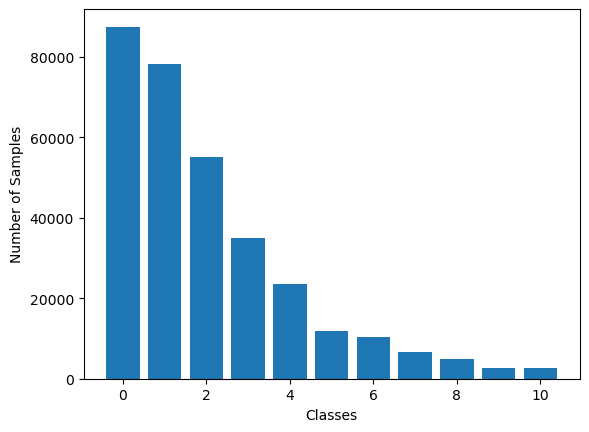

In [3]:
class_counts = df_encoded['Stay'].value_counts()
x = np.arange(len(class_counts))
plt.bar(x,class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
print(class_counts)


### Missied values

In this section, we investigate whether there are records with some missed values. Therefore, we can drom those records as one of options.

In [4]:
print('Total amount of samples ',len(df_encoded))
for column in df_encoded.columns:
    nan_count = df_encoded[column].isna().sum()
    print(column,nan_count)

Total amount of samples  318438
case_id 0
patientid 0
Hospital_code 0
City_Code_Hospital 0
Available Extra Rooms in Hospital 0
Bed Grade 113
City_Code_Patient 4532
Severity of Illness 0
Visitors with Patient 0
Admission_Deposit 0
Hospital_type_code_a 0
Hospital_type_code_b 0
Hospital_type_code_c 0
Hospital_type_code_d 0
Hospital_type_code_e 0
Hospital_type_code_f 0
Hospital_type_code_g 0
Hospital_region_code_X 0
Hospital_region_code_Y 0
Hospital_region_code_Z 0
Department_TB & Chest disease 0
Department_anesthesia 0
Department_gynecology 0
Department_radiotherapy 0
Department_surgery 0
Ward_Type_P 0
Ward_Type_Q 0
Ward_Type_R 0
Ward_Type_S 0
Ward_Type_T 0
Ward_Type_U 0
Ward_Facility_Code_A 0
Ward_Facility_Code_B 0
Ward_Facility_Code_C 0
Ward_Facility_Code_D 0
Ward_Facility_Code_E 0
Ward_Facility_Code_F 0
Type of Admission_Emergency 0
Type of Admission_Trauma 0
Type of Admission_Urgent 0
Age_0-10 0
Age_11-20 0
Age_21-30 0
Age_31-40 0
Age_41-50 0
Age_51-60 0
Age_61-70 0
Age_71-80 0
Age_81

### Removing records with those missed values and saving the resulted preprocessed dataframe

In [5]:
#Drop records with nan value
df_encoded = df_encoded.dropna()
df_encoded.to_csv('preprocessed_hospital_stay_data.csv', index=False)

In [6]:
# Grouping records based on Patient ID. In the excersice description file, it is mentioned that some of patients are repeated.
# We just group the patients based on their id to see if the sample are redunndent or not.

df_similar_patientid = df_encoded.groupby('patientid').filter(lambda x: len(x) > 1)

print("\nRecords with similar patientid:")
print(df_similar_patientid)


Records with similar patientid:
        case_id  patientid  Hospital_code  City_Code_Hospital  \
0             1      31397              8                   3   
1             2      31397              2                   5   
2             3      31397             10                   1   
3             4      31397             26                   2   
4             5      31397             26                   2   
...         ...        ...            ...                 ...   
318348   318349      88623             25                   1   
318362   318363       2862             12                   9   
318363   318364       2862             22                   9   
318377   318378      58605             12                   9   
318378   318379      58605             32                   9   

        Available Extra Rooms in Hospital  Bed Grade  City_Code_Patient  \
0                                       3        2.0                7.0   
1                                   